<a href="https://colab.research.google.com/github/Gabriellemga/R/blob/main/R/Alugueis_SP_analise_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Preços de moradias em São Paulo**

## Dados

* Endereço : O endereço do imóvel;

* Distrito : O distrito onde o imóvel está localizado;

* Área : A área do imóvel em metros quadrados;

* Quartos : O número de quartos na propriedade;

* Garagem : O número de vagas de estacionamento disponíveis na propriedade;

* Aluguel : O valor do aluguel mensal do imóvel;

* Tipo : O tipo do imóvel (apartamento, casa, estúdio, etc.);

* Total : O custo total do imóvel, incluindo aluguel, impostos e outras taxa;*

# 01-Trabalhando com od dados

## Importando a base de dados

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.2     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
dados <- read.csv('/content/dados.csv', sep = ';')

In [3]:
head(dados)

,address,district,area,bedrooms,garage,type,rent,total
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587


## Limpando os dados

In [4]:
is.na(dados)

address,district,area,bedrooms,garage,type,rent,total
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [5]:
sum(is.na(dados))

[1] 39

In [6]:
rowSums(is.na(dados))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
   [37] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
   [73] 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [109] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [145] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [181] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [217] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [253] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [289] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [325] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [361] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [397] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [433] 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [469] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [505] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [541] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [577] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [613] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [649] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [685] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0
  [721] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [757] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [793] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [829] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [865] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [901] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [937] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0
  [973] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1009] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1045] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1081] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1117] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1153] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1189] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1225] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1261] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0
 [1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1369] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1405] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1441] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1477] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1513] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1549] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1585] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1621] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1657] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1693] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1729] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [1765] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [18

In [7]:
rowSums(is.na(dados)) > 0

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE
   [25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [85]  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
   [97] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [109] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [121] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [133] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [145] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [157] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [169] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [181] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [193] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [205] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [217] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [229] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [241] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [253] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [265] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [277] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [289] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [301] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [313] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [325] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [337] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [349] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [361] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [373] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [385] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [397] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [409] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [421] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [433] FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE
  [445] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [457] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [469] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [481] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [493] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [505] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [517] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [529] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [541] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [553] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [565] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [577] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [589] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
  [6

In [8]:
linhas_invalidas <- rowSums(is.na(dados)) > 0

In [9]:
dados[linhas_invalidas, ]

,address,district,area,bedrooms,garage,type,rent,total
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
24,Avenida Rio Branco,,NA,NA,NA,,NA,NA
85,Rua Gomes de Carvalho,Vila Olímpia,70,2,NA,Apartamento,NA,NA
439,Rua Ernani Pinto,Vila Maria Alta,123,3,1,Apartamento,NA,NA
713,Rua Poconé,,NA,NA,NA,,NA,NA
961,Rua Trapiche,Vila Matilde,NA,NA,NA,Casa em condomínio,NA,NA
1320,Largo do Arouche,República,NA,NA,NA,,NA,NA
1637,Rua Eugênio Pradez,Jardim Piracuama,45,1,0,Apartamento,NA,NA
1949,Rua Rondinha,Chácara Inglesa,NA,NA,NA,,NA,NA
9170,Rua Diogo Pereira,Super Quadra Morumbi,NA,NA,NA,,NA,NA


In [13]:
dados_limpos <- na.omit(dados)

In [15]:
sum(is.na(dados_limpos))

[1] 0

## Tratando valores

In [16]:
colunas <- c('area', 'rent', 'total')

for(coluna in colunas){
  resultado <- any(dados_limpos[[coluna]] == 0)
  print(paste('A coluna', coluna, 'tem zero?', resultado))
}

[1] "A coluna area tem zero? TRUE"
[1] "A coluna rent tem zero? FALSE"
[1] "A coluna total tem zero? FALSE"


In [17]:
dados_limpos %>% dplyr::filter(area == 0)

address,district,area,bedrooms,garage,type,rent,total
<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>
Rua Relíquia,Jardim das Laranjeiras,0,2,1,Apartamento,1600,2569
Rua Edmundo de Amicis,Morumbi,0,3,2,Casa,3200,3351


In [18]:
dados_limpos <- dados_limpos %>% dplyr::filter(area != 0)

In [19]:
dados_limpos %>% dplyr::filter(area == 0)

address,district,area,bedrooms,garage,type,rent,total
<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>


## Criando novas variáveis

In [20]:
dados_limpos$Aluguel_por_metro_quadrado <- dados_limpos$rent / dados_limpos$area

In [21]:
dados_limpos$Total_por_metro_quadrado <- dados_limpos$total / dados_limpos$area

In [22]:
head(dados_limpos)

,address,district,area,bedrooms,garage,type,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
,<chr>,<chr>,<int>,<int>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>
1,Rua Herval,Belenzinho,21,1,0,Studio e kitnet,2400,2939,114.28571,139.95238
2,Avenida São Miguel,Vila Marieta,15,1,1,Studio e kitnet,1030,1345,68.66667,89.66667
3,Rua Oscar Freire,Pinheiros,18,1,0,Apartamento,4000,4661,222.22222,258.94444
4,Rua Júlio Sayago,Vila Ré,56,2,2,Casa em condomínio,1750,1954,31.25000,34.89286
5,Rua Barata Ribeiro,Bela Vista,19,1,0,Studio e kitnet,4000,4654,210.52632,244.94737
6,Rua Domingos Paiva,Brás,50,2,1,Apartamento,3800,4587,76.00000,91.74000


# 02-Estatisticas descritivas

## Obtendo estatísticas por variável

In [23]:
mean(dados_limpos$rent)

[1] 3251.857

In [25]:
aggregate(list(Aluguel_media = dados_limpos$rent), list(Tipo = dados_limpos$type), mean)

Tipo,Aluguel_media
<chr>,<dbl>
Apartamento,3358.278
Casa,3472.020
Casa em condomínio,3912.552
Studio e kitnet,2128.489


## Obtendo estatísticas para conjuntos de variáveis

In [28]:
#calculo da média
aggregate(dados_limpos %>% select(rent, total, Aluguel_por_metro_quadrado, Total_por_metro_quadrado), list(Tipo = dados_limpos$type), mean)

Tipo,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apartamento,3358.278,4437.307,48.46547,62.77483
Casa,3472.020,3824.411,27.69859,30.18694
Casa em condomínio,3912.552,4576.232,68.29282,85.16387
Studio e kitnet,2128.489,2668.934,72.76630,90.55275


In [29]:
#calculo da mediana
aggregate(dados_limpos %>% select(rent, total, Aluguel_por_metro_quadrado, Total_por_metro_quadrado), list(Tipo = dados_limpos$type), median)

Tipo,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apartamento,2500,3296.0,41.55844,54.74157
Casa,2600,2842.5,24.74342,26.81796
Casa em condomínio,2200,2712.0,31.25000,35.04651
Studio e kitnet,1850,2318.0,61.11111,76.91667


In [30]:
#calculo do desvio padão
aggregate(dados_limpos %>% select(rent, total, Aluguel_por_metro_quadrado, Total_por_metro_quadrado), list(Tipo = dados_limpos$type), sd)

Tipo,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Apartamento,2640.232,3497.657,27.45893,32.06921
Casa,2874.288,3259.624,31.66870,33.90043
Casa em condomínio,3930.907,4733.798,545.56517,733.35311
Studio e kitnet,1366.585,1625.094,80.64141,95.49953


##  Outras estatísticas

In [31]:
summary(dados_limpos)

   address            district              area           bedrooms    
 Length:11645       Length:11645       Min.   :  1.00   Min.   :0.000  
 Class :character   Class :character   1st Qu.: 40.00   1st Qu.:1.000  
 Mode  :character   Mode  :character   Median : 60.00   Median :2.000  
                                       Mean   : 84.71   Mean   :1.967  
                                       3rd Qu.: 96.00   3rd Qu.:3.000  
                                       Max.   :580.00   Max.   :6.000  
     garage          type                rent           total      
 Min.   :0.000   Length:11645       Min.   :  500   Min.   :  509  
 1st Qu.:0.000   Class :character   1st Qu.: 1590   1st Qu.: 1996  
 Median :1.000   Mode  :character   Median : 2420   Median : 3057  
 Mean   :1.061                      Mean   : 3252   Mean   : 4081  
 3rd Qu.:2.000                      3rd Qu.: 3800   3rd Qu.: 4775  
 Max.   :6.000                      Max.   :25000   Max.   :28700  
 Aluguel_por_metro_q

# 03-Visualização de dados

## Avaliando a variável alvo

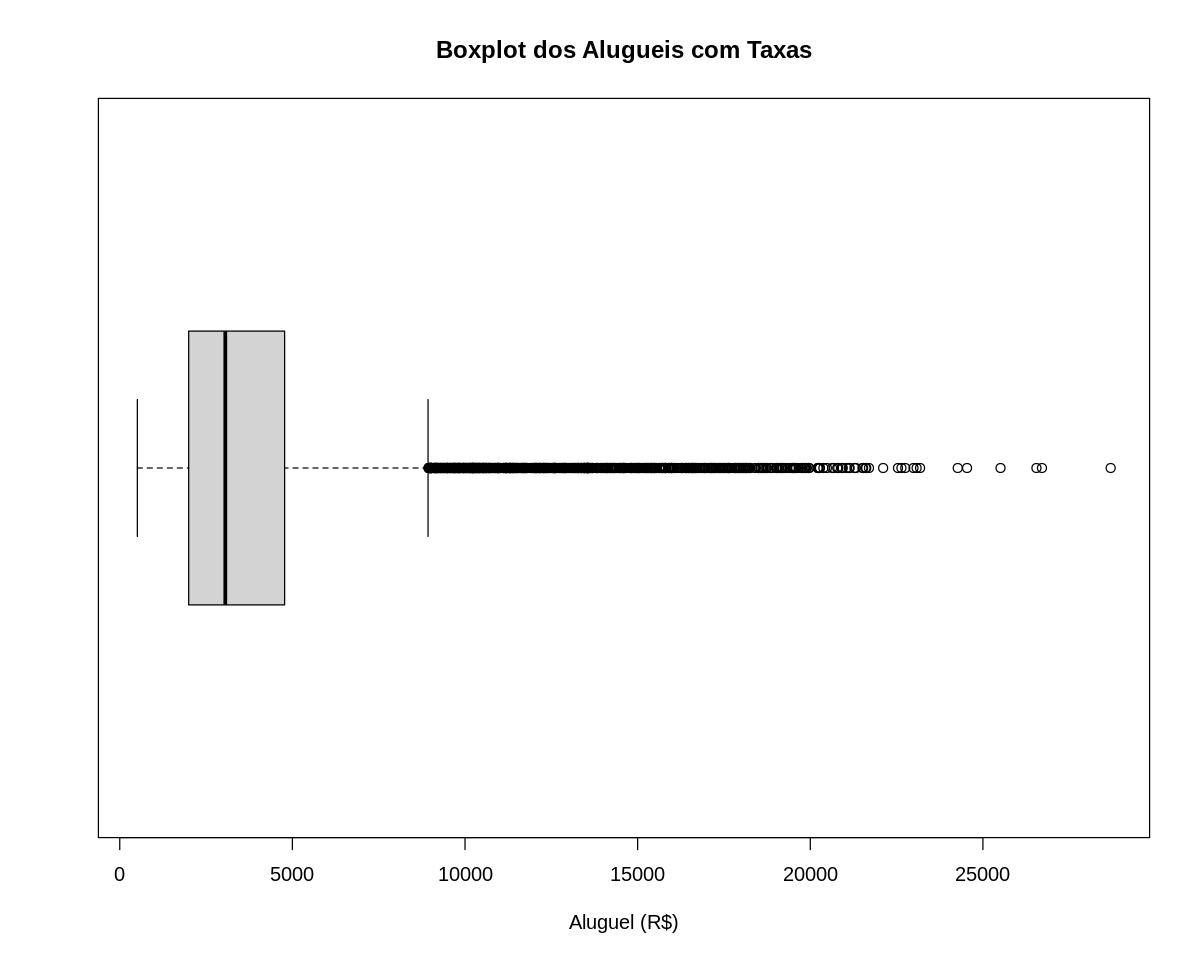

In [32]:
options(repr.plot.width = 10, repr.plot.height = 8)

boxplot(
    dados_limpos$total,
    horizontal = TRUE,
    main = "Boxplot dos Alugueis com Taxas",
    xlab = "Aluguel (R$)"
)

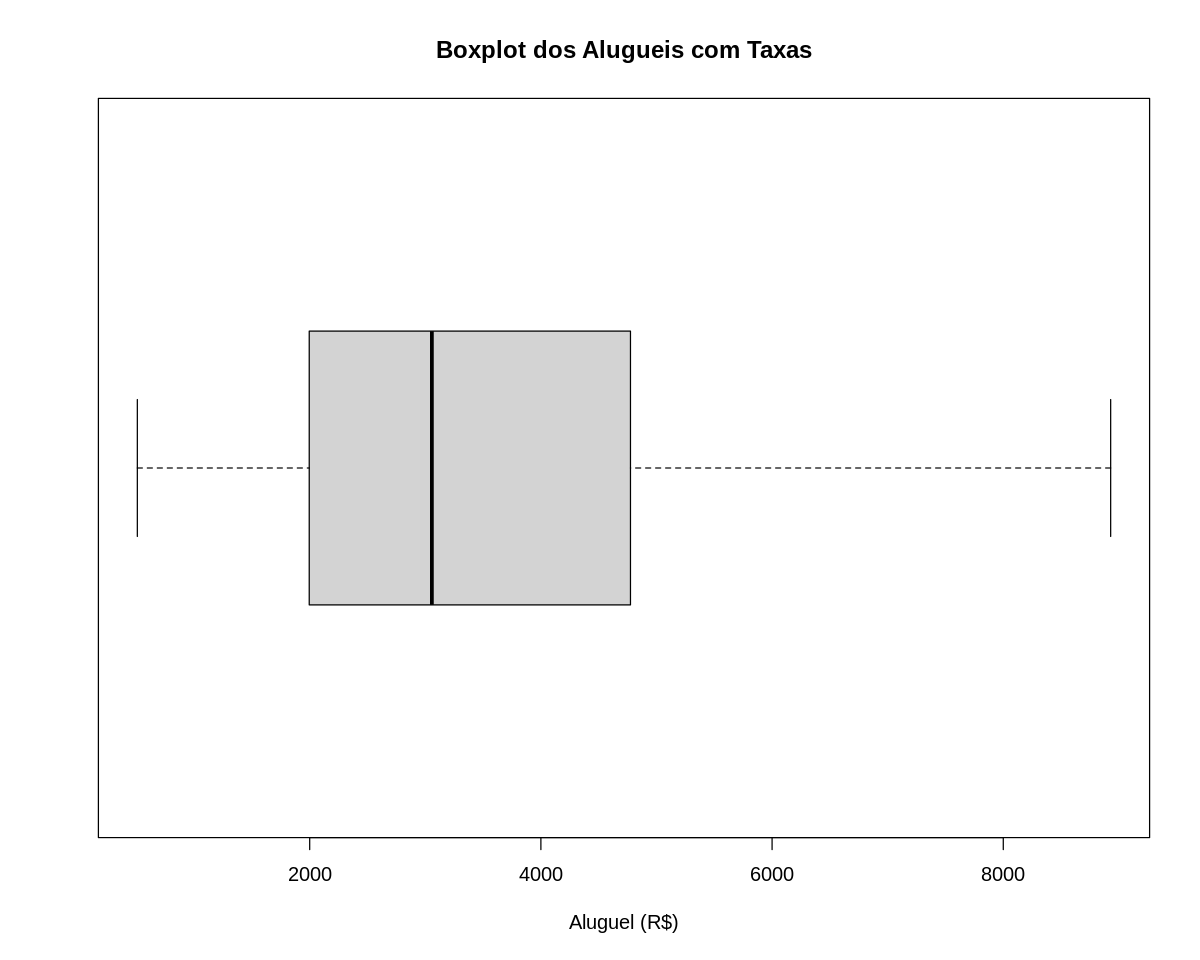

In [33]:
boxplot(
    dados_limpos$total,
    horizontal = TRUE,
    main = "Boxplot dos Alugueis com Taxas",
    xlab = "Aluguel (R$)",
    outline = FALSE
)

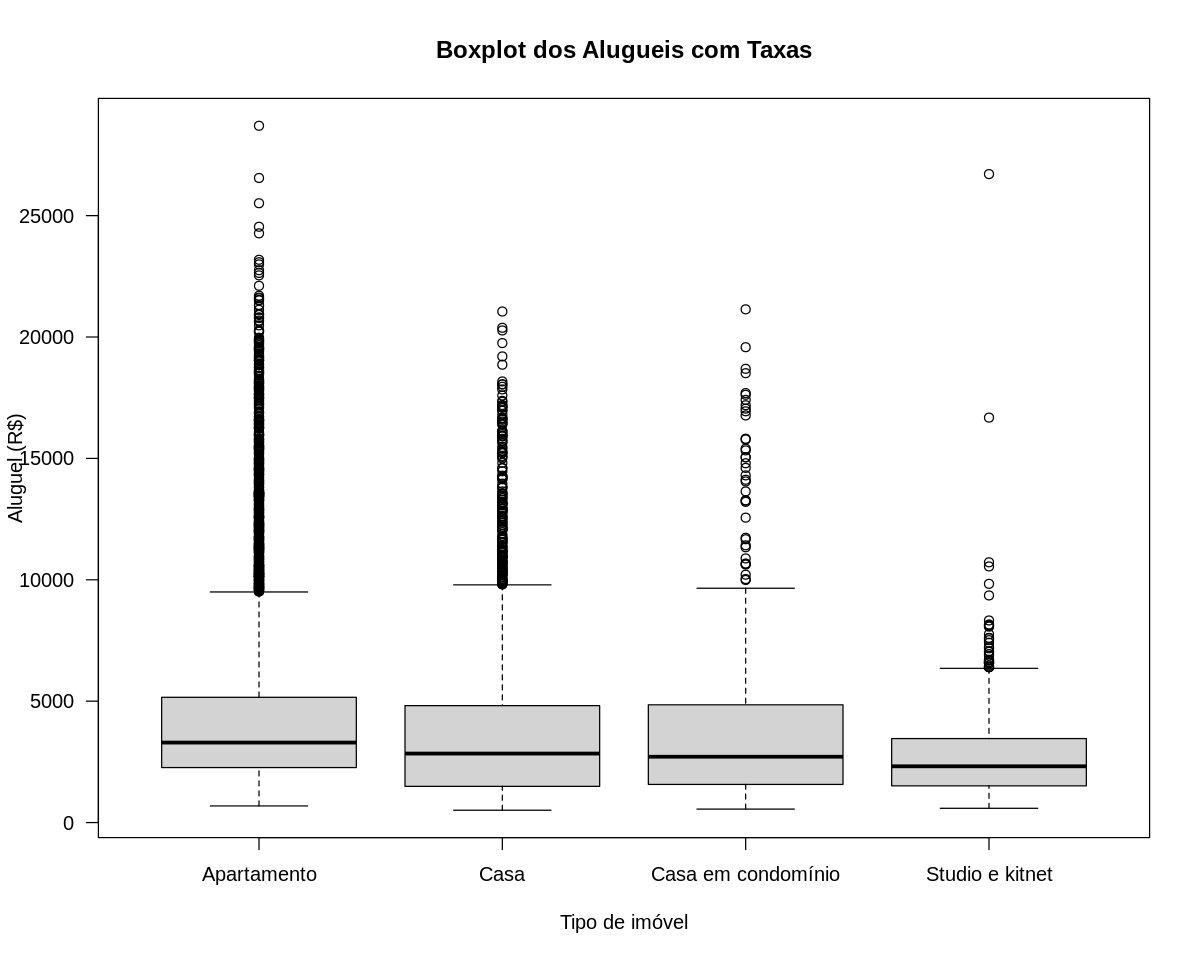

In [34]:
boxplot(
    total ~ type,
    data = dados_limpos,
    horizontal = FALSE,
    main = "Boxplot dos Alugueis com Taxas",
    xlab = "Tipo de imóvel",
    ylab = "Aluguel (R$)",
    las = 1
)

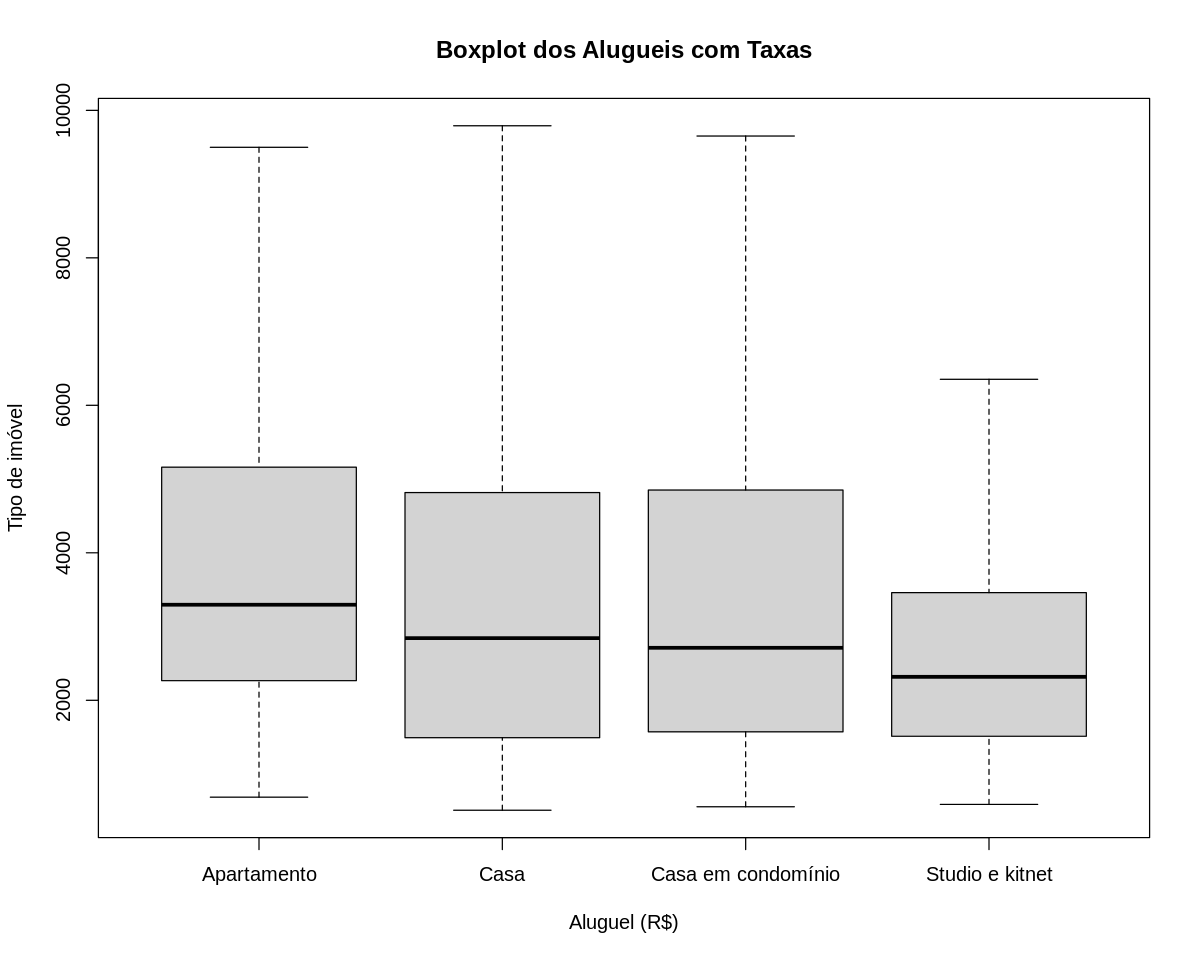

In [35]:
boxplot(
    total ~ type,
    data = dados_limpos,
    horizontal = FALSE,
    main = "Boxplot dos Alugueis com Taxas",
    ylab = "Tipo de imóvel",
    xlab = "Aluguel (R$)",
    outline = FALSE
)

## Avaliando as variáveis explicativas

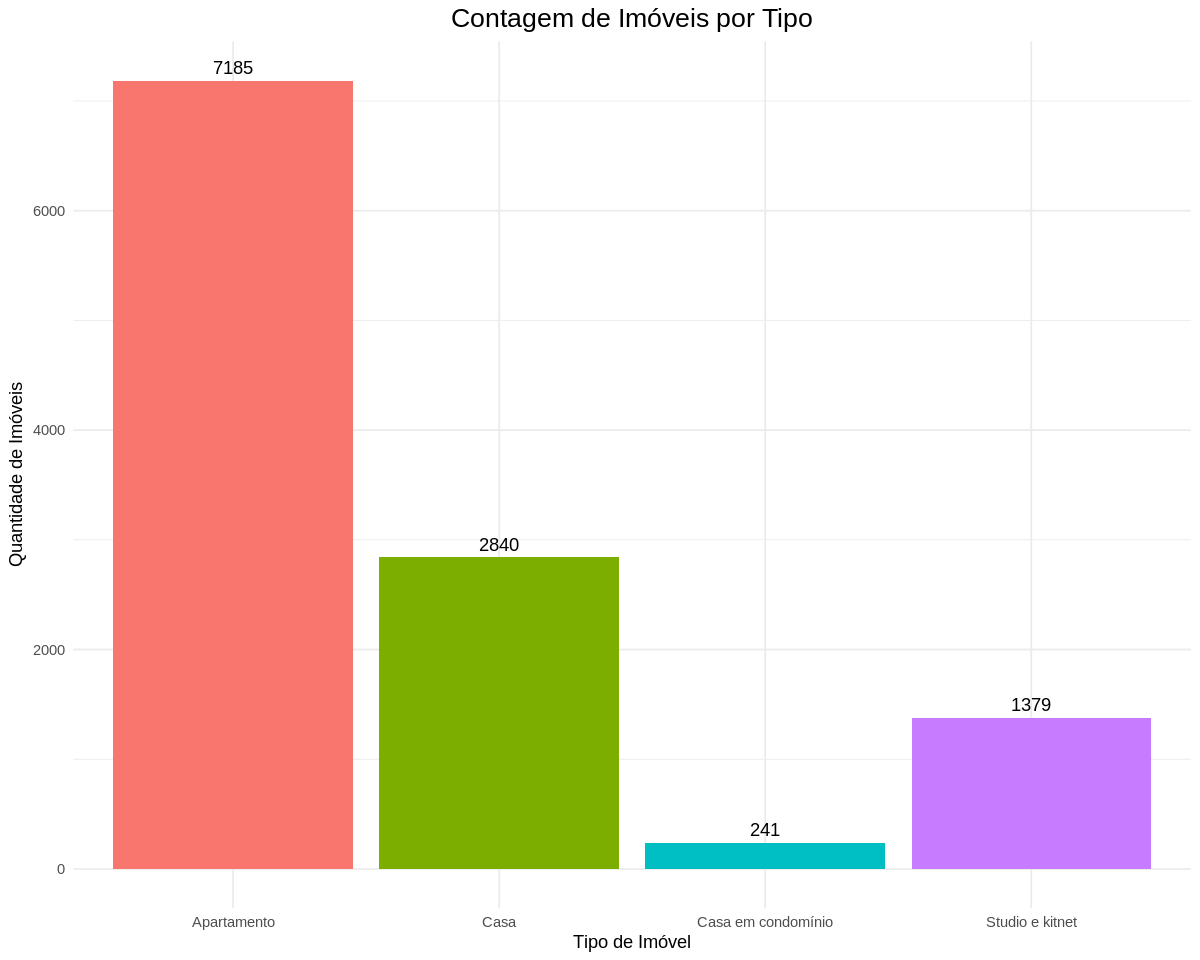

In [36]:
ggplot(
    dados_limpos,
    aes(x = type, fill = type)
) +
geom_bar() +
theme_minimal() +
labs(
    title = "Contagem de Imóveis por Tipo",
    x = "Tipo de Imóvel",
    y = "Quantidade de Imóveis"
) +
theme(
  legend.position = "none",
  plot.title = element_text(hjust = 0.5, size = 16)
)+
geom_text(
    stat = "count",
    aes(label = after_stat(count)),
    vjust = -0.5
)

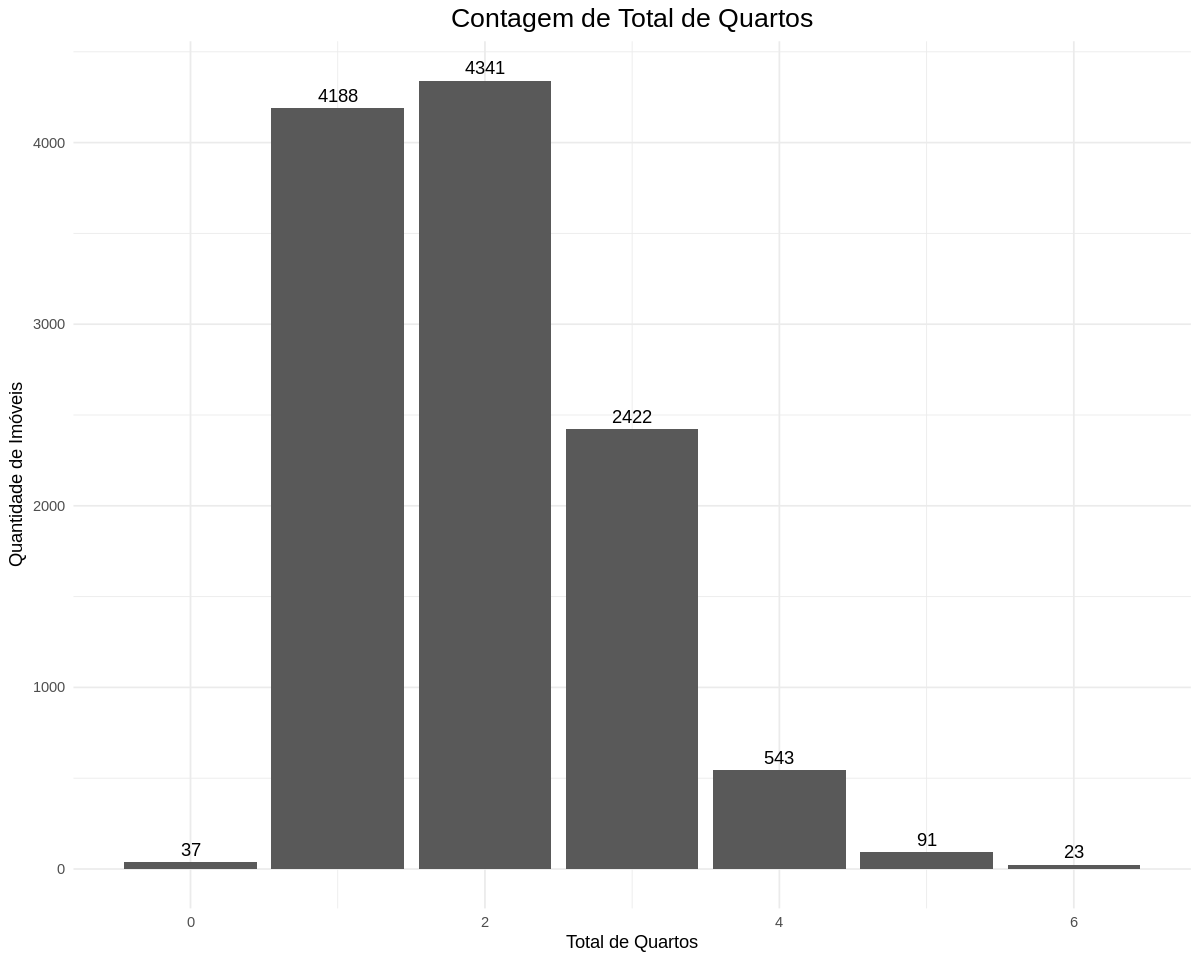

In [37]:
ggplot(
    dados_limpos,
    aes(x = bedrooms)
) +
geom_bar() +
theme_minimal() +
labs(
    title = "Contagem de Total de Quartos",
    x = "Total de Quartos",
    y = "Quantidade de Imóveis"
) +
theme(
  legend.position = "none",
  plot.title = element_text(hjust = 0.5, size = 16)
) +
geom_text(
    stat = "count",
    aes(label = after_stat(count)),
    vjust = -0.5
)

## Gráficos de dispersão

`geom_smooth()` using formula = 'y ~ x'


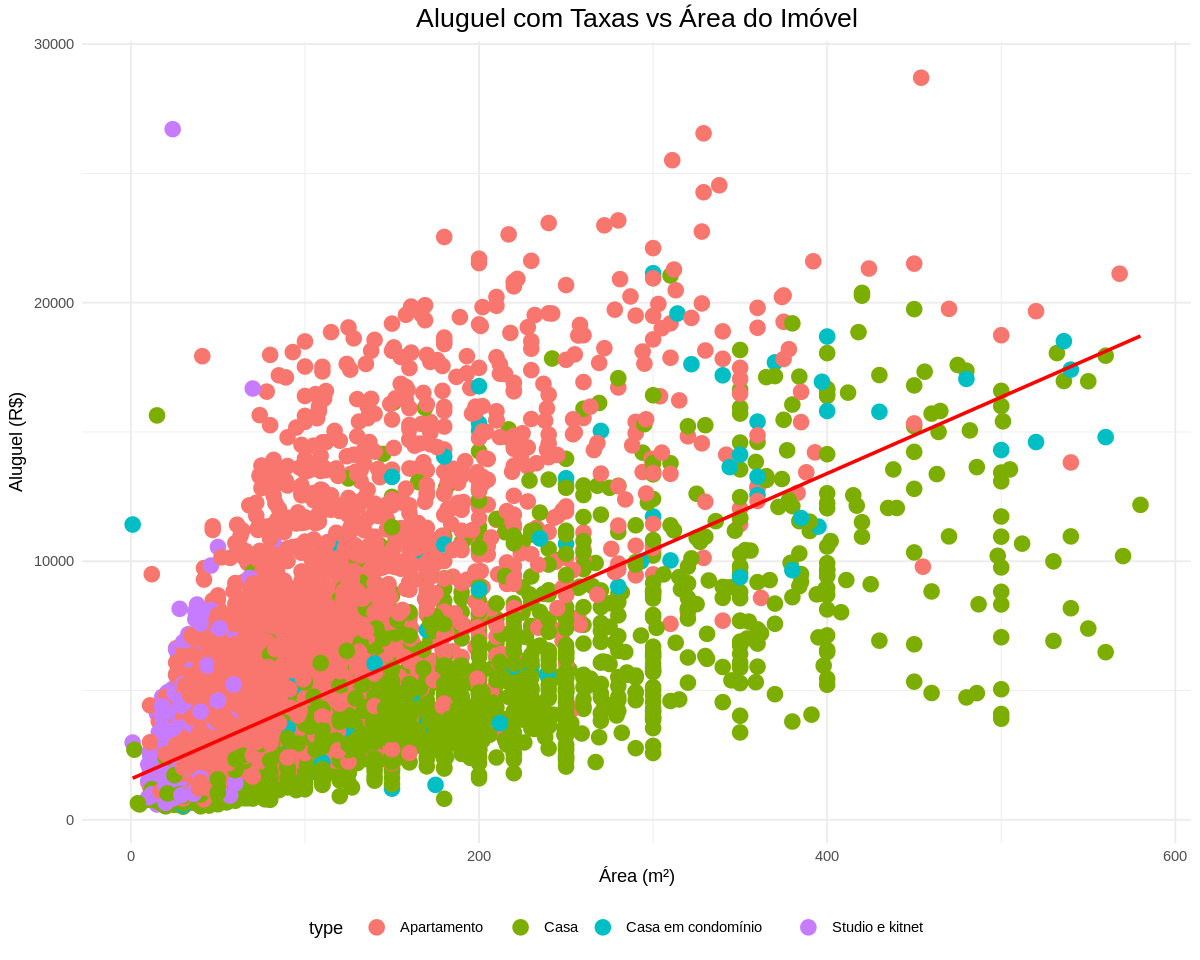

In [40]:
ggplot(
    dados_limpos,
    aes(x = area, y = total, color = type)
) +
geom_point(size = 4) +
geom_smooth(method = "lm", se = FALSE, color = "red") + #adiciona linha de ajuste (regressão linear)
theme_minimal() +
labs(
  title = "Aluguel com Taxas vs Área do Imóvel",
    x = "Área (m²)",
    y = "Aluguel (R$)"
) +
theme(
  legend.position = "bottom",
  plot.title = element_text(hjust = 0.5, size = 16)
)

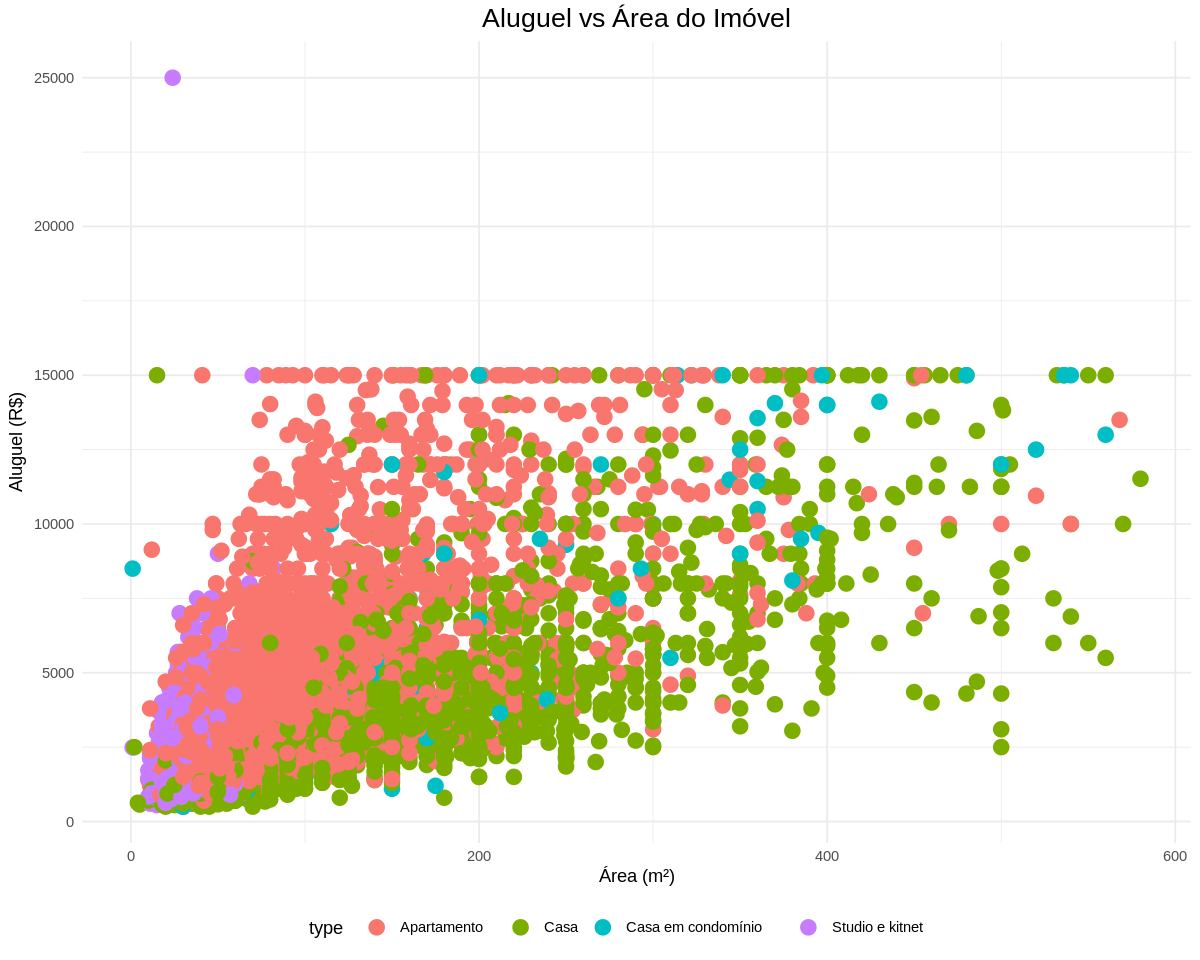

In [39]:
ggplot(
    dados_limpos,
    aes(x = area, y = rent, color = type)
) +
geom_point(size = 4) +
theme_minimal() +
labs(
  title = "Aluguel vs Área do Imóvel",
    x = "Área (m²)",
    y = "Aluguel (R$)"
) +
theme(
  legend.position = "bottom",
  plot.title = element_text(hjust = 0.5, size = 16)
)

# 04-Distribuição de frequencia

## Tabela de frequências

In [41]:
#frequencia absoluta
table(dados_limpos$bedrooms)


   0    1    2    3    4    5    6 
  37 4188 4341 2422  543   91   23 

In [42]:
prop.table(table(dados_limpos$bedrooms)) * 100


         0          1          2          3          4          5          6 
 0.3177329 35.9639330 37.2778016 20.7986260  4.6629455  0.7814513  0.1975097 

In [43]:
freq <- cbind(frequencia = table(dados_limpos$bedrooms), percentual = prop.table(table(dados_limpos$bedrooms)) * 100)
freq

,frequencia,percentual
0,37,0.3177329
1,4188,35.9639330
2,4341,37.2778016
3,2422,20.7986260
4,543,4.6629455
5,91,0.7814513
6,23,0.1975097


In [44]:
colnames(freq) <- c('Frequência', 'Porcentagem')
freq

,Frequência,Porcentagem
0,37,0.3177329
1,4188,35.9639330
2,4341,37.2778016
3,2422,20.7986260
4,543,4.6629455
5,91,0.7814513
6,23,0.1975097


In [45]:
rownames(freq) <- c('0 quartos','1 quarto', '2 quartos', '3 quartos', '4 quartos', '5 quartos', '6 quartos')
freq

,Frequência,Porcentagem
0 quartos,37,0.3177329
1 quarto,4188,35.9639330
2 quartos,4341,37.2778016
3 quartos,2422,20.7986260
4 quartos,543,4.6629455
5 quartos,91,0.7814513
6 quartos,23,0.1975097


## Distribuição de frequências para variáveis contínuas

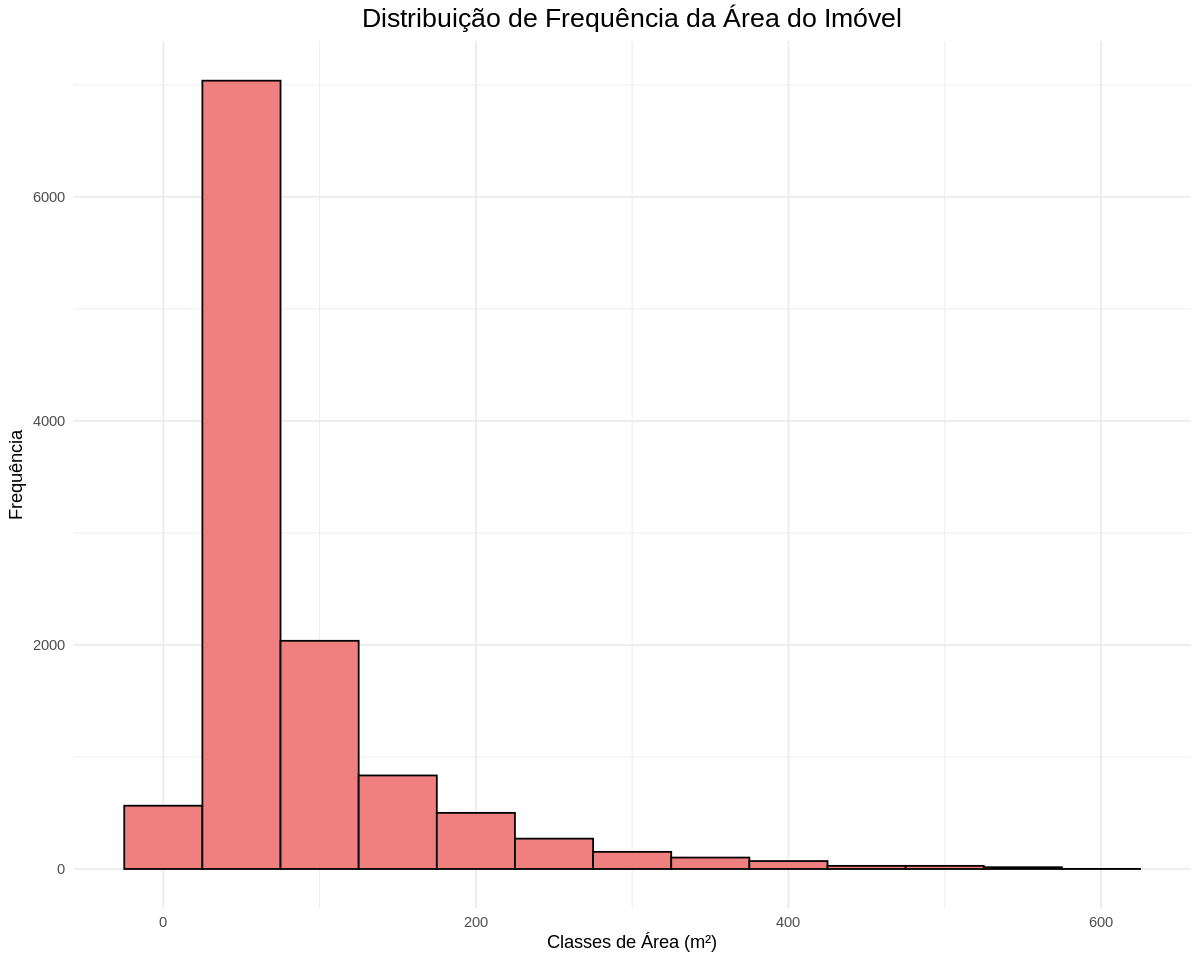

In [46]:
ggplot(
    dados_limpos,
    aes(x = area)
) +
geom_histogram(
    binwidth = 50,
    fill = "lightcoral",
    color = "black"
) +
labs(
    title = "Distribuição de Frequência da Área do Imóvel",
    x = "Classes de Área (m²)", y = "Frequência"
) +
theme_minimal() +
theme(
  plot.title = element_text(hjust = 0.5, size = 16)
)

##  Distribuição de frequências conjunta (tabelas cruzadas)

In [48]:
frequencia <- table(dados_limpos$bedrooms, dados_limpos$type)
frequencia

   
    Apartamento Casa Casa em condomínio Studio e kitnet
  0           7    4                  0              26
  1        2044  762                 64            1318
  2        3413  798                 96              34
  3        1482  891                 49               0
  4         227  291                 25               0
  5          10   75                  6               0
  6           2   19                  1               1

In [49]:
rownames(frequencia) <- c('0 quartos','1 quarto', '2 quartos', '3 quartos', '4 quartos', '5 quartos', '6 quartos')
colnames(frequencia) <- c('Apartamento', 'Casa', 'Casa em condomínio', 'Studio e kitnet')
frequencia <- cbind(frequencia)
frequencia

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0 quartos,7,4,0,26
1 quarto,2044,762,64,1318
2 quartos,3413,798,96,34
3 quartos,1482,891,49,0
4 quartos,227,291,25,0
5 quartos,10,75,6,0
6 quartos,2,19,1,1


In [50]:
percentual <- prop.table(frequencia) * 100
percentual

,Apartamento,Casa,Casa em condomínio,Studio e kitnet
0 quartos,0.06011164,0.03434951,0.000000000,0.223271790
1 quarto,17.55259768,6.54358094,0.549592100,11.318162301
2 quartos,29.30871619,6.85272649,0.824388149,0.291970803
3 quartos,12.72649206,7.65135251,0.420781451,0.000000000
4 quartos,1.94933448,2.49892658,0.214684414,0.000000000
5 quartos,0.08587377,0.64405324,0.051524259,0.000000000
6 quartos,0.01717475,0.16316015,0.008587377,0.008587377


# 05-Correlação e regrressao linear

## Correlação

In [51]:
dados_numericos <- dados_limpos %>% select_if(is.numeric)

matriz_correlacao <- cor(dados_numericos, use = "complete.obs")

matriz_correlacao

,area,bedrooms,garage,rent,total,Aluguel_por_metro_quadrado,Total_por_metro_quadrado
area,1.0000000,0.72813110,0.73365734,0.6671566,0.6520997,-0.10755308,-0.10269093
bedrooms,0.7281311,1.00000000,0.65689285,0.5311848,0.5260162,-0.08149474,-0.07363028
garage,0.7336573,0.65689285,1.00000000,0.6173099,0.6180236,-0.02471434,-0.01553536
rent,0.6671566,0.53118475,0.61730994,1.0000000,0.9781086,0.13138754,0.12012384
total,0.6520997,0.52601621,0.61802358,0.9781086,1.0000000,0.12444363,0.12415167
Aluguel_por_metro_quadrado,-0.1075531,-0.08149474,-0.02471434,0.1313875,0.1244436,1.00000000,0.99623416
Total_por_metro_quadrado,-0.1026909,-0.07363028,-0.01553536,0.1201238,0.1241517,0.99623416,1.00000000


## Regressão linear

In [53]:
modelo <- lm(total ~ area + bedrooms + garage, data = dados_limpos)

summary(modelo)


Call:
lm(formula = total ~ area + bedrooms + garage, data = dados_limpos)

Residuals:
     Min       1Q   Median       3Q      Max 
-11490.9  -1218.0   -470.5    751.6  24799.5 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1345.2674    55.1533  24.391  < 2e-16 ***
area          18.7119     0.5139  36.410  < 2e-16 ***
bedrooms     116.1620    36.8129   3.155  0.00161 ** 
garage       869.8407    30.5386  28.483  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2447 on 11641 degrees of freedom
Multiple R-squared:  0.4679,	Adjusted R-squared:  0.4678 
F-statistic:  3412 on 3 and 11641 DF,  p-value: < 2.2e-16


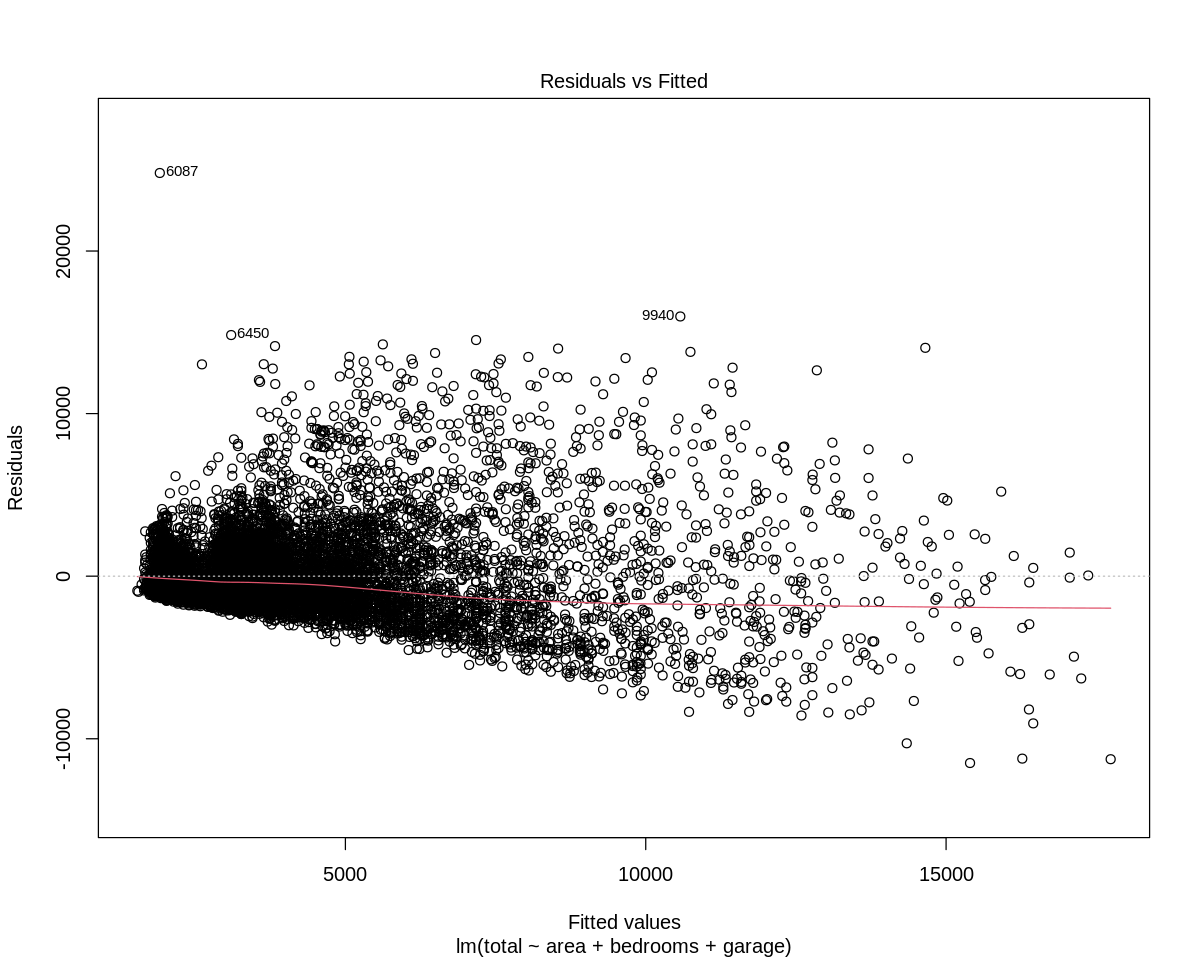

In [54]:
plot(modelo, which = 1)

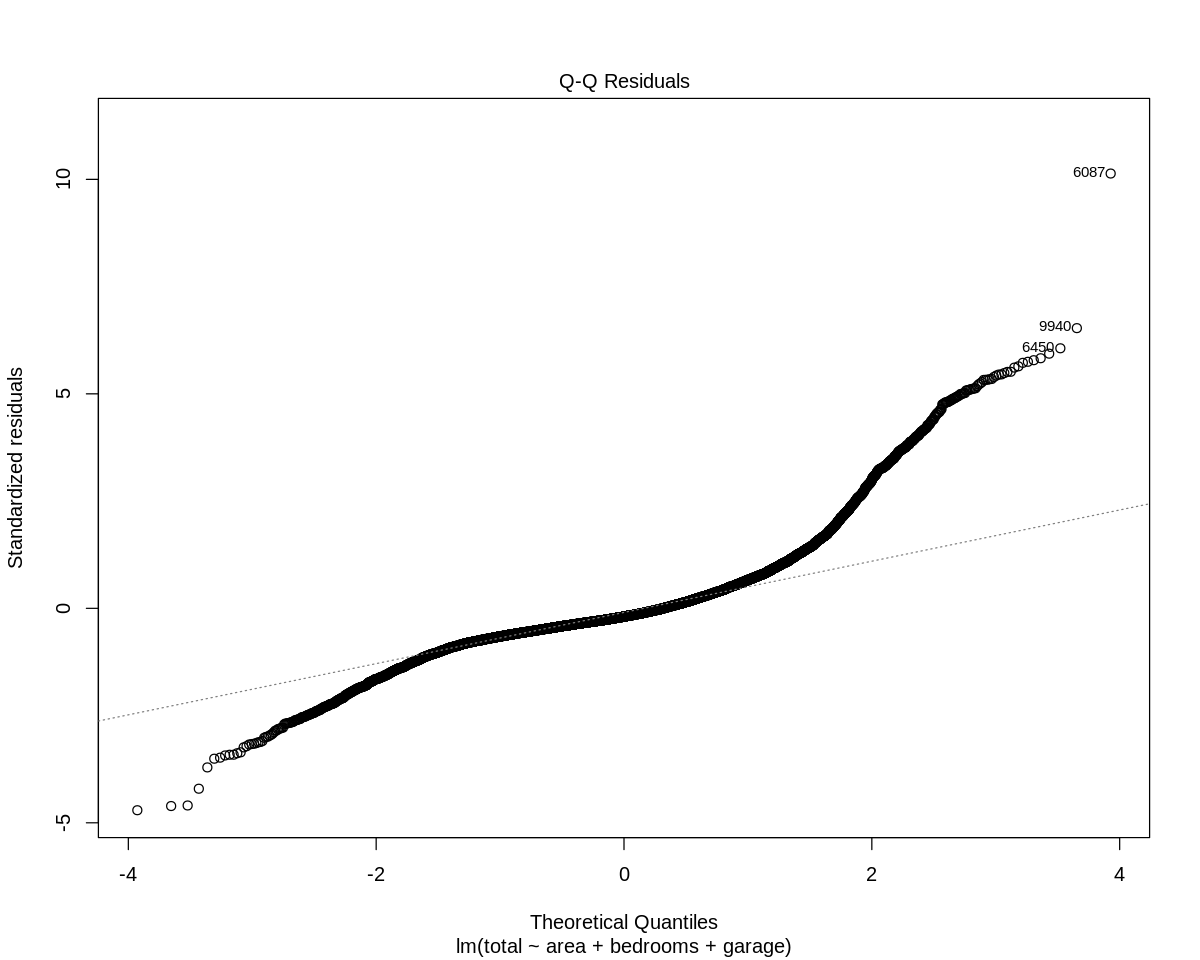

In [55]:
plot(modelo, which = 2)

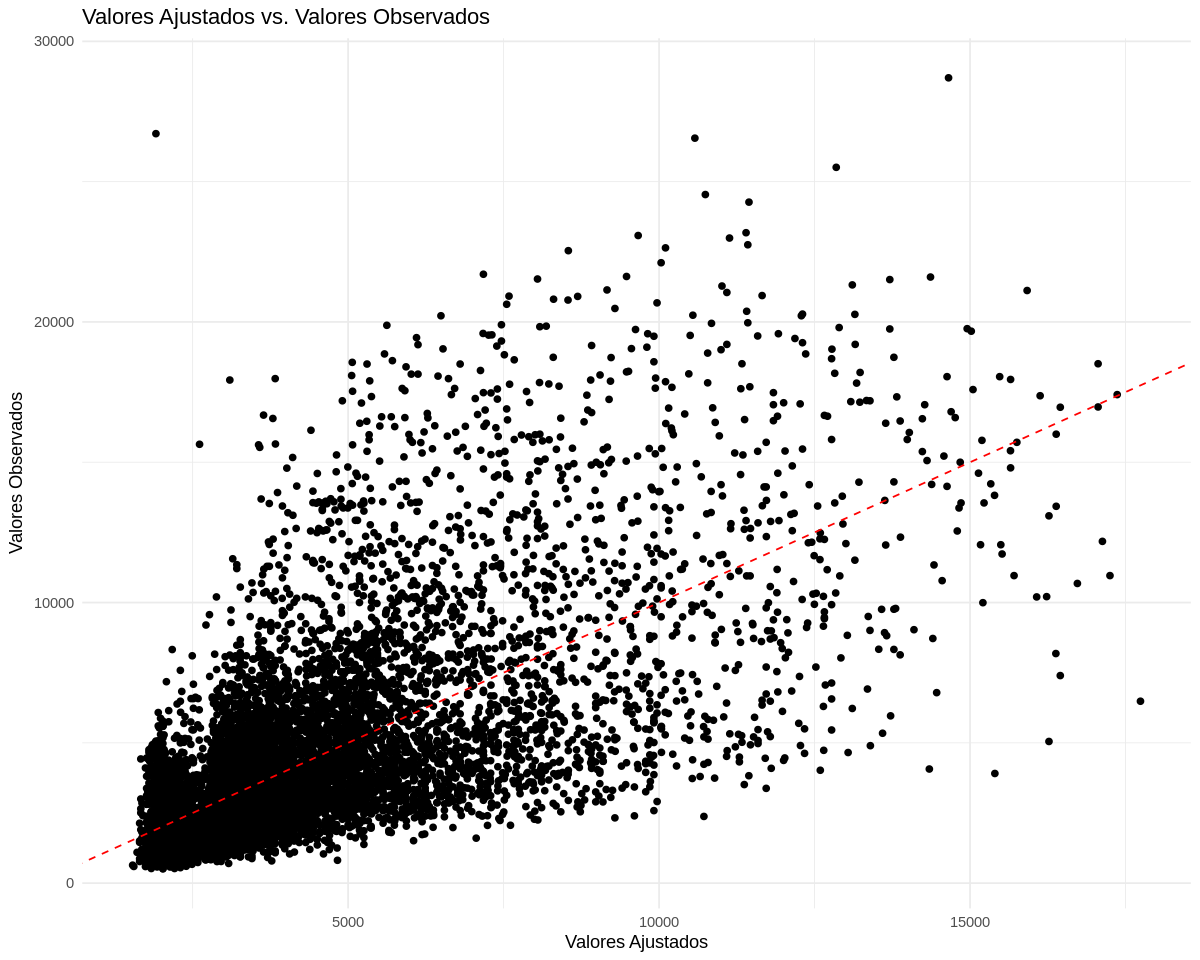

In [56]:
valores_ajustados <- fitted(modelo)

ggplot(data = dados_limpos, aes(x = valores_ajustados, y = total)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, col = "red", linetype = "dashed") +
  labs(title = "Valores Ajustados vs. Valores Observados",
       x = "Valores Ajustados", y = "Valores Observados") +
  theme_minimal()

## Regressão linear com transformação de variáveis

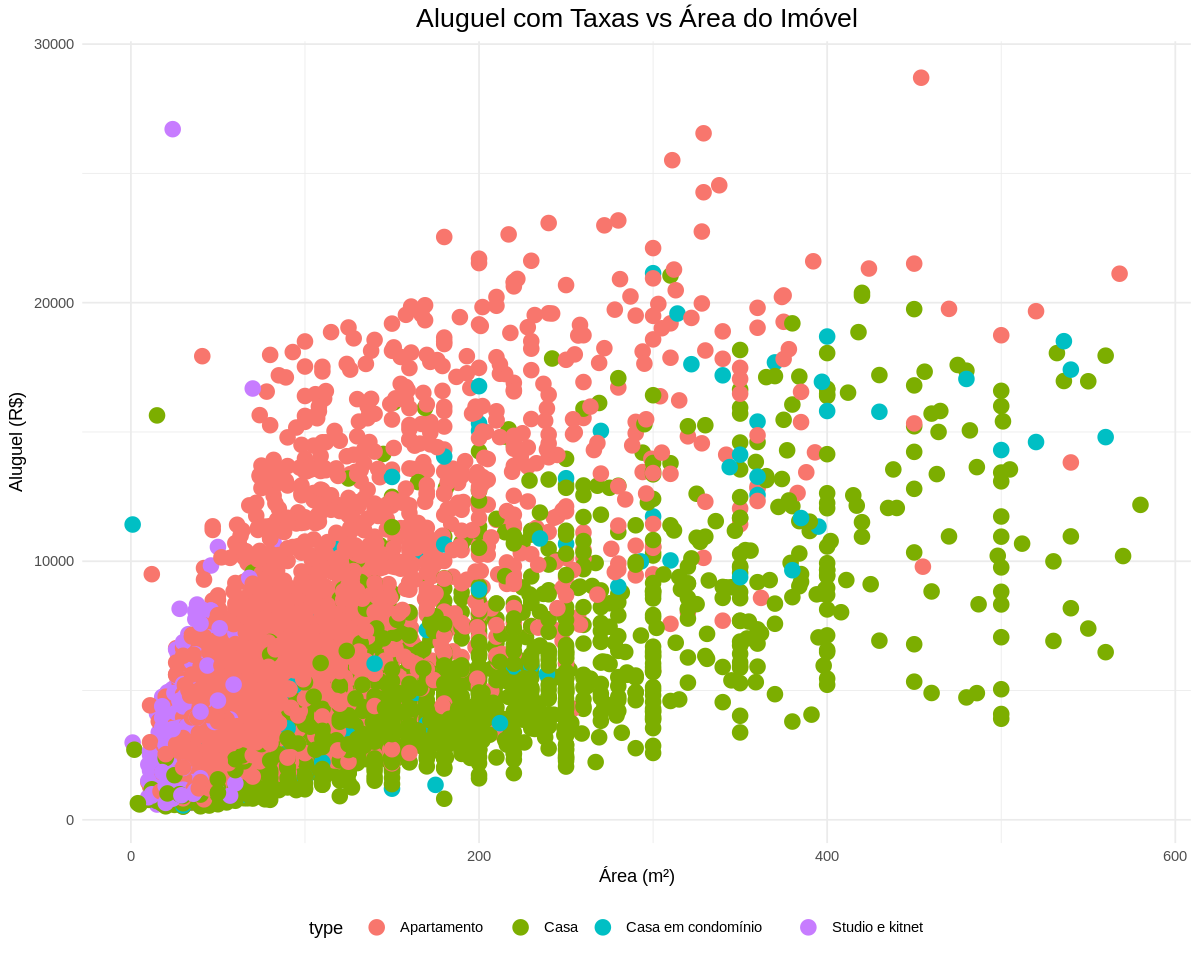

In [57]:
ggplot(
    dados_limpos,
    aes(x = area, y = total, color = type)
) +
geom_point(size = 4) +
theme_minimal() +
labs(
  title = "Aluguel com Taxas vs Área do Imóvel",
    x = "Área (m²)",
    y = "Aluguel (R$)"
) +
theme(
  legend.position = "bottom",
  plot.title = element_text(hjust = 0.5, size = 16)
)

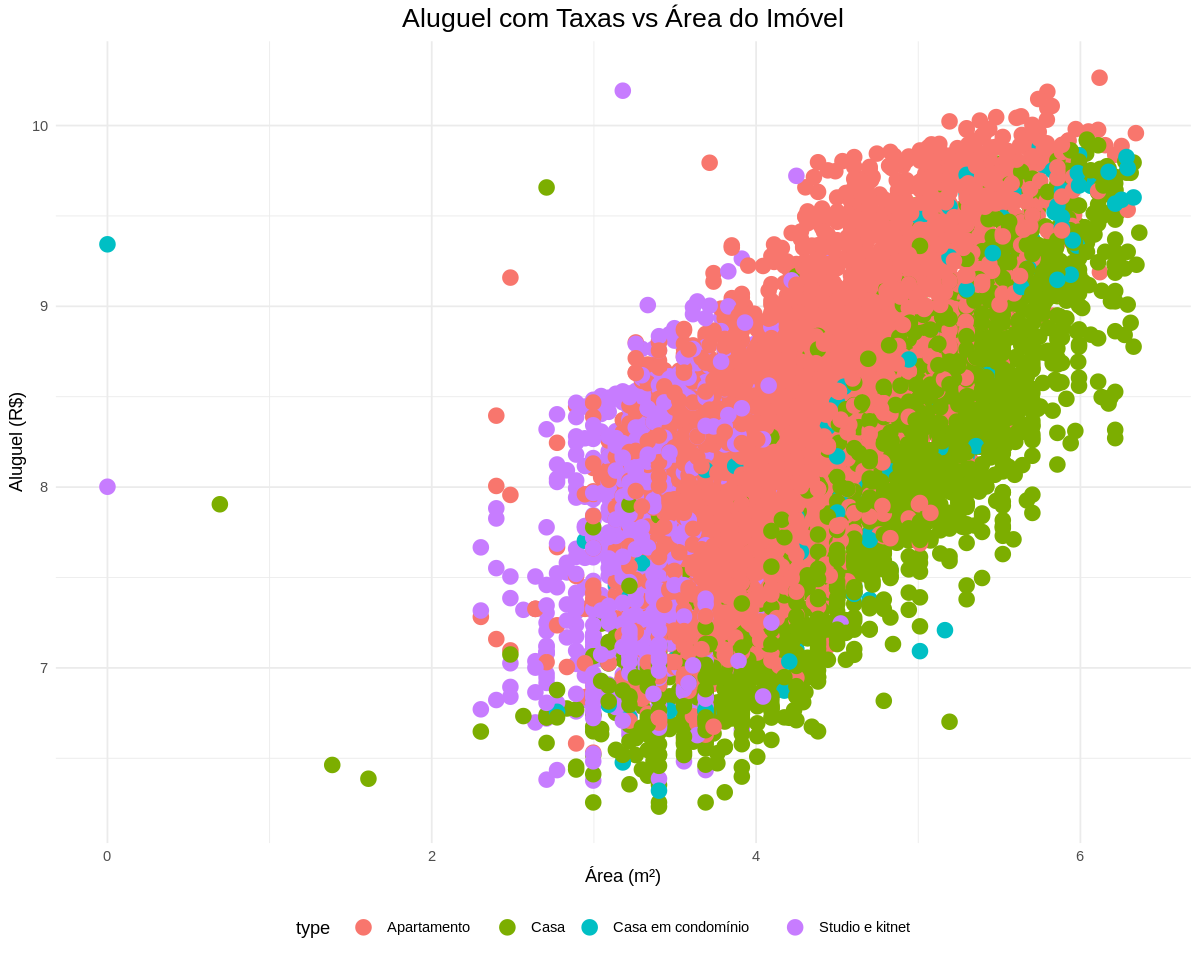

In [58]:
ggplot(
    dados_limpos,
    aes(x = log(area), y = log(total), color = type)
) +
geom_point(size = 4) +
theme_minimal() +
labs(
  title = "Aluguel com Taxas vs Área do Imóvel",
    x = "Área (m²)",
    y = "Aluguel (R$)"
) +
theme(
  legend.position = "bottom",
  plot.title = element_text(hjust = 0.5, size = 16)
)

In [59]:
modelo_log <- lm(log(total) ~ log(area) + log(bedrooms+1) + log(garage+1), data = dados_limpos)

summary(modelo_log)


Call:
lm(formula = log(total) ~ log(area) + log(bedrooms + 1) + log(garage + 
    1), data = dados_limpos)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.49750 -0.33515 -0.03454  0.31597  2.80495 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.29988    0.03487 180.662   <2e-16 ***
log(area)          0.33716    0.01160  29.056   <2e-16 ***
log(bedrooms + 1)  0.02374    0.02353   1.009    0.313    
log(garage + 1)    0.56436    0.01263  44.691   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4764 on 11641 degrees of freedom
Multiple R-squared:  0.5026,	Adjusted R-squared:  0.5024 
F-statistic:  3921 on 3 and 11641 DF,  p-value: < 2.2e-16


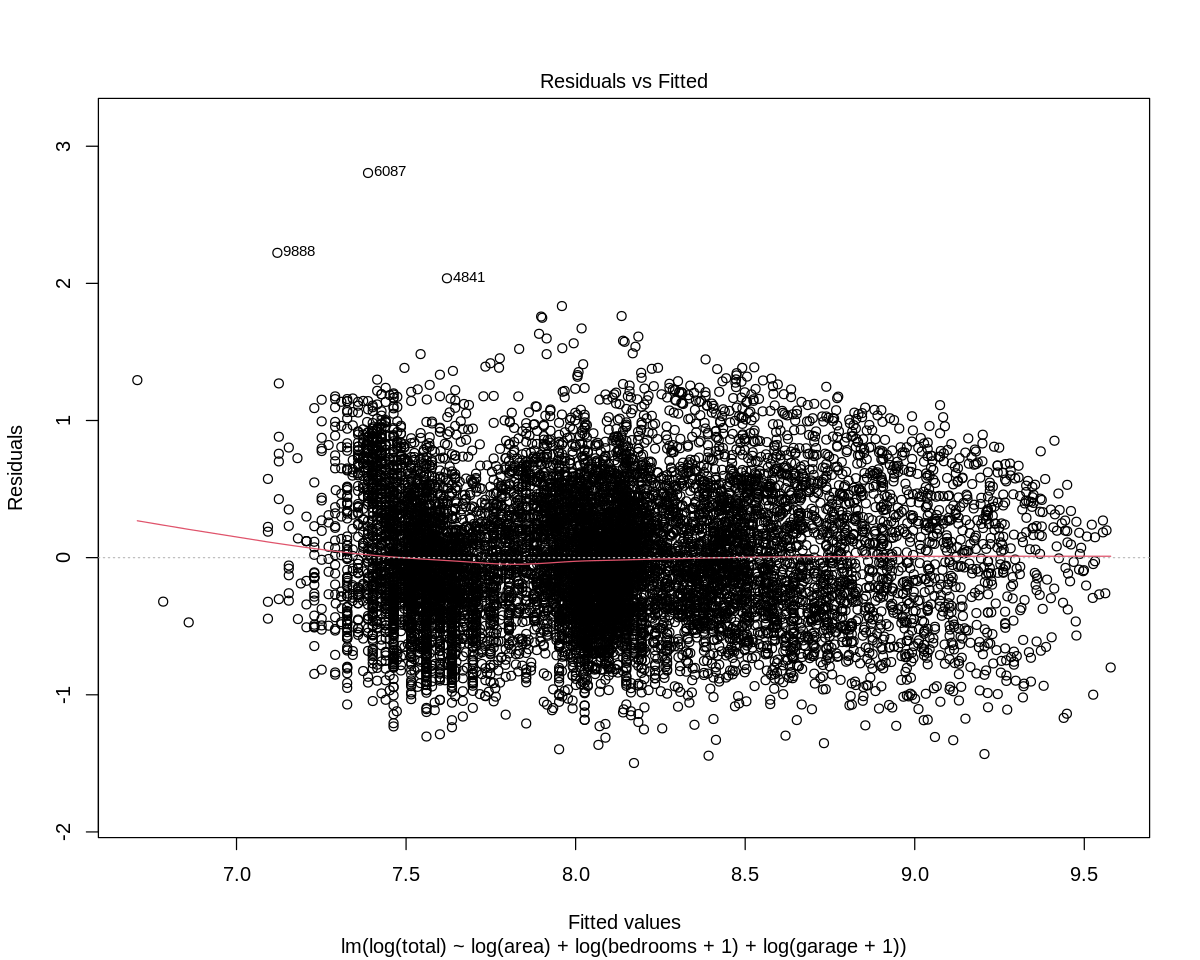

In [60]:
plot(modelo_log, which = 1)

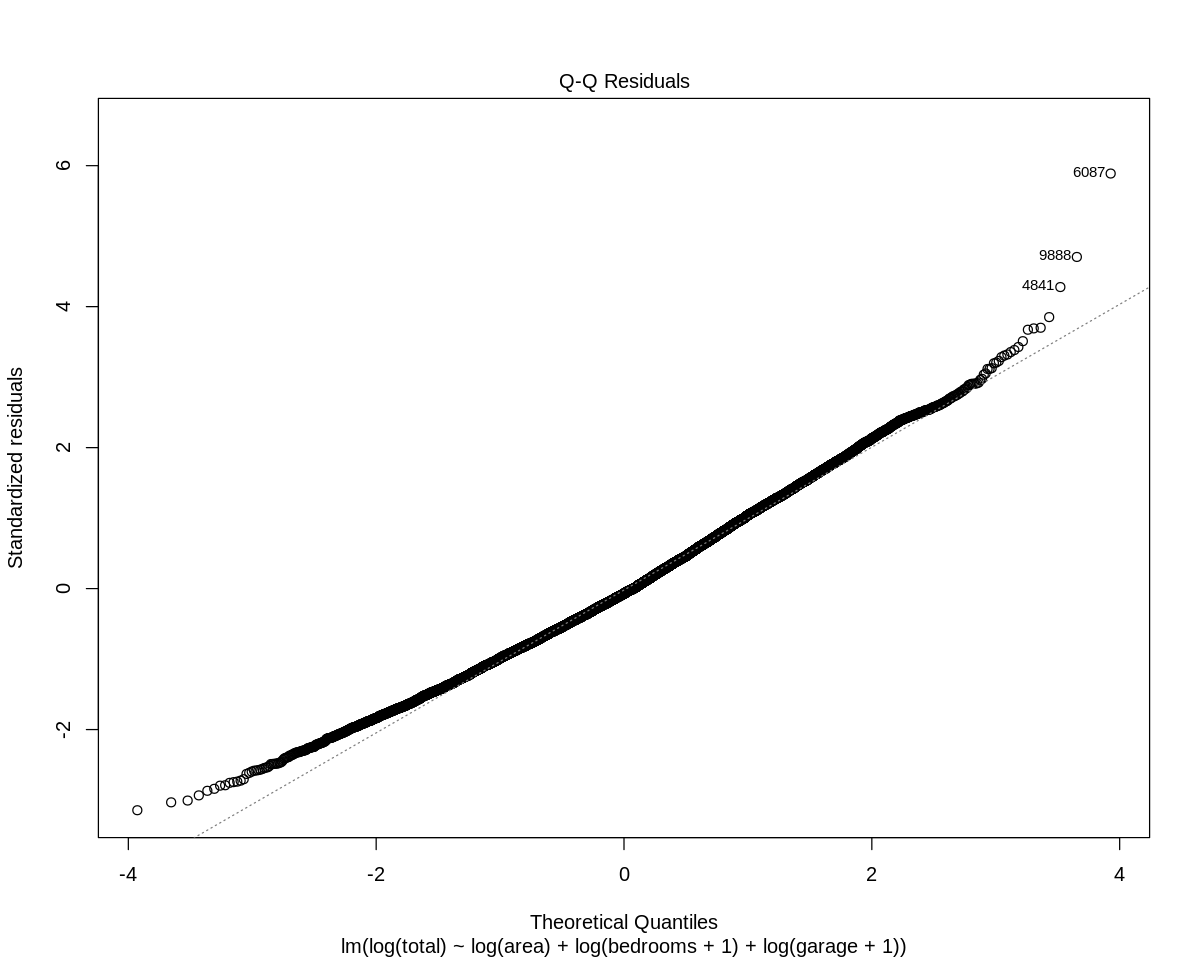

In [61]:
plot(modelo_log, which = 2)

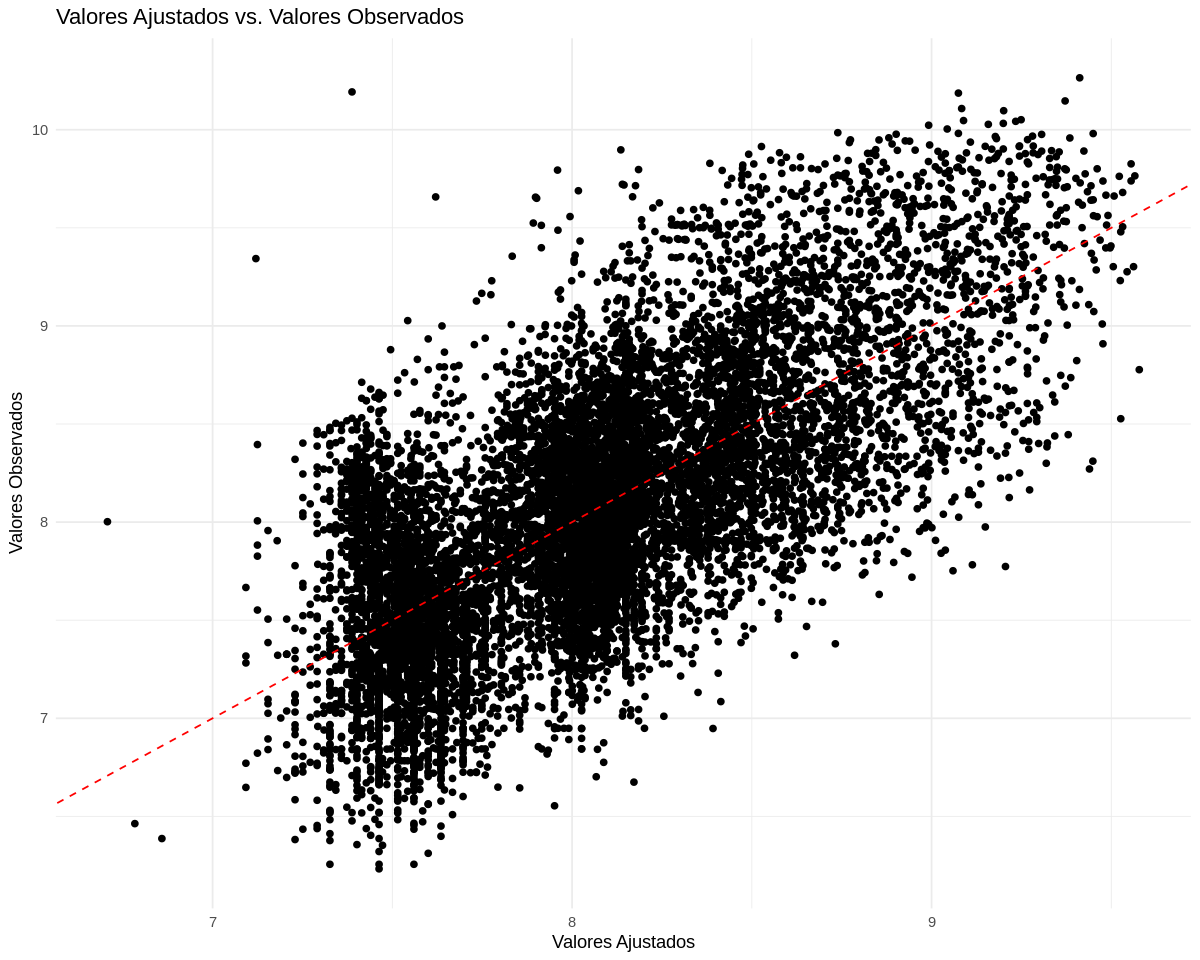

In [62]:
valores_ajustados <- fitted(modelo_log)

ggplot(data = dados_limpos, aes(x = valores_ajustados, y = log(total))) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, col = "red", linetype = "dashed") +
  labs(title = "Valores Ajustados vs. Valores Observados",
       x = "Valores Ajustados", y = "Valores Observados") +
  theme_minimal()

## Fazendo Previsões

In [63]:
novos_imoveis <- data.frame(
    area = c(100, 150, 200),
    bedrooms = c(2, 3, 4),
    garage = c(1, 2, 2)
)

In [64]:
previsoes_log <- predict(modelo_log, newdata = novos_imoveis)

previsoes_aluguel <- exp(previsoes_log)

previsoes_aluguel

1        2        3 
3904.211 5665.624 6275.843